# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('API.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE Here
crypto_assets_data = {
    "crypto assets": [1.2, 5.3]
}
crypto_coin = ["BTC", "ETH"]
df_crypto = pd.DataFrame(crypto_assets_data, index=crypto_coin)
df_crypto

,crypto assets
BTC,1.2
ETH,5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
BTC_data = requests.get(btc_url).json()
BTC_price = BTC_data ['data']['1']['quotes']['USD']['price']
print(BTC_price)

61764.0


In [6]:
# Fetch current ETH price
ETH_data = requests.get(eth_url).json()
ETH_price = BTC_data ['data']['1']['quotes']['USD']['price']
print(ETH_price)

61764.0


In [7]:
# Compute current value of my crpto
my_btc_value = BTC_price * 1.2
my_eth_value = ETH_price * 5.3

# Print current crypto wallet balance
my_btc ="Bitcoin"
my_eth = "Etherium"
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your Bitcoin BTC is $74116.80
The current value of your Etherium ETH is $327349.20


In [8]:
Total_Crypto_Value = my_eth_value+my_btc_value
Total_Crypto_Value

401466.0

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("API_intro_KEY")
alpaca_secret_key = os.getenv("API_secret_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [11]:
# Create the Alpaca API object
crypto = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


In [12]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-01-20", tz="America/New_York").isoformat()
current_date = pd.Timestamp("2021-10-26", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = crypto.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=current_date,
    limit=1000
).df

# Display sample data
df_ticker.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-01-20 00:00:00-05:00  117.35  117.4300  117.3100  117.40  3877734   
2021-01-21 00:00:00-05:00  117.22  117.2985  117.1400  117.26  5801029   
2021-01-22 00:00:00-05:00  117.29  117.3200  117.1900  117.26  3469745   
2021-01-25 00:00:00-05:00  117.39  117.5600  117.3600  117.54  3977366   
2021-01-26 00:00:00-05:00  117.46  117.5850  117.4255  117.51  3451493   

                              SPY                                       
                             open      high      low   close    volume  
time                                                                    
2021-01-20 00:00:00-05:00  381.11  384.7900  380.690  383.86  53064901  
2021-01-21 00:00:00-05:00  384.49  384.9500  383.250  384.20  41800991  
2021-01-22 00:00:00-05:00  382.25  384.1256  381.835  382.86  39108239  
2021-01-25 00:00:00-05:00  383.67  384.7700  378.460  384.40  61090775  
2021-01-26 00:00:00-05:00  385.41  385.8500  383.540  383.83  36871235

In [13]:
# Pick AGG and SPY close prices
Crypto_closing_prices = pd.DataFrame()

# Fetch the closing prices 
agg_close_price = df_ticker["AGG"]["close"]["2021-10-26"]
spy_close_price = df_ticker["SPY"]["close"]["2021-10-26"]


In [14]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $114.37
Current SPY closing price: $455.97


In [15]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22798.50
The current value of your 200 AGG shares is $22874.00


In [16]:
Total_Shares_Value = my_agg_value+my_spy_value
Total_Shares_Value

45672.5

### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
porfolio_data = {
    "Amount": [Total_Shares_Value,Total_Crypto_Value]  
}
Asset = ["Shares","Crypto"]


# Create savings DataFrame
df_savings = pd.DataFrame(porfolio_data, index=Asset)

# Display savings DataFrame
display(df_savings)

,Amount
Shares,45672.5
Crypto,401466.0


In [18]:
!pip install matplotlib

<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='Amount'>

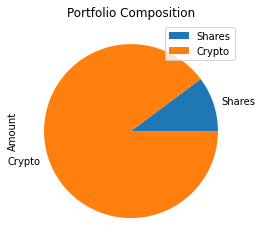

In [19]:
# Plot savings pie chart
df_savings.plot.pie(y= "Amount", title="Portfolio Composition")

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund


36000

In [23]:
Total_Savings= float(df_savings.sum())
Total_Savings

447138.5

In [27]:
if Total_Savings > emergency_fund:
        greeting = f"Hi congrats for having enough money in this fund."
elif (Total_Savings == emergency_fund):
        greeting = f"Hi congrats you have reahced your goal."
elif Total_Savings < emergency_fund:
        greeting = f"Hi congrats for having enough money in this fund."
print(greeting)

Hi congrats for having enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [31]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [32]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = crypto.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=current_date,
    limit=1000
).df


# Display sample data
df_stock_data.head()


AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2017-11-06 00:00:00-05:00  109.56  109.59  109.46  109.540  1120425  258.29   
2017-11-07 00:00:00-05:00  109.58  109.61  109.49  109.570  1617243  258.97   
2017-11-08 00:00:00-05:00  109.54  109.60  109.46  109.500  2228734  258.46   
2017-11-09 00:00:00-05:00  109.39  109.46  109.30  109.420  1941380  257.73   
2017-11-10 00:00:00-05:00  109.06  109.15  108.97  108.985  1488306  257.73   

                                                             
                             high     low   close    volume  
time                                                         
2017-11-06 00:00:00-05:00  259.00  258.22  258.82  22683758  
2017-11-07 00:00:00-05:00  259.35  258.09  258.70  40140309  
2017-11-08 00:00:00-05:00  259.22  258.15  259.13  32174191  
2017-11-09 00:00:00-05:00  258.39  256.36  258.20  75322217  
2017-11-10 00:00:00-05:00  258.21  257.37  258.08  35755951

In [33]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
 # Set number of simulations
num_sims = 500

MC_Crypto = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30,
    weights = [.40,.60]
)

In [34]:
# Printing the simulation input data
df_stock_data

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-11-06 00:00:00-05:00  109.56  109.5900  109.4600  109.540  1120425   
2017-11-07 00:00:00-05:00  109.58  109.6100  109.4900  109.570  1617243   
2017-11-08 00:00:00-05:00  109.54  109.6000  109.4600  109.500  2228734   
2017-11-09 00:00:00-05:00  109.39  109.4600  109.3000  109.420  1941380   
2017-11-10 00:00:00-05:00  109.06  109.1500  108.9700  108.985  1488306   
...                           ...       ...       ...      ...      ...   
2021-10-20 00:00:00-04:00  114.17  114.2900  114.0600  114.070  5881766   
2021-10-21 00:00:00-04:00  114.01  114.0400  113.8423  113.850  4741154   
2021-10-22 00:00:00-04:00  113.97  114.1399  113.8950  114.070  3309637   
2021-10-25 00:00:00-04:00  114.06  114.2700  114.0600  114.170  7088133   
2021-10-26 00:00:00-04:00  114.25  114.3800  114.1100  114.370  5284755   

                              SPY                                     
                             open     high     low   close    volume  
time                                                                  
2017-11-06 00:00:00-05:00  258.29  259.000  258.22  258.82  22683758  
2017-11-07 00:00:00-05:00  258.97  259.350  258.09  258.70  40140309  
2017-11-08 00:00:00-05:00  258.46  259.220  258.15  259.13  32174191  
2017-11-09 00:00:00-05:00  257.73  258.390  256.36  258.20  75322217  
2017-11-10 00:00:00-05:00  257.73  258.210  257.37  258.08  35755951  
...                           ...      ...     ...     ...       ...  
2021-10-20 00:00:00-04:00  451.13  452.732  451.01  452.39  41594298  
2021-10-21 00:00:00-04:00  451.76  453.829  451.31  453.61  33945007  
2021-10-22 00:00:00-04:00  453.13  454.670  451.05  453.13  50771701  
2021-10-25 00:00:00-04:00  454.28  455.900  452.39  455.48  37918548  
2021-10-26 00:00:00-04:00  457.20  458.490  455.56  455.97  49865704  

[1000 rows x 10 columns]

In [35]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Crypto.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/williammccarthy/Documents/API_Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997236,0.984103,1.003417,0.993723,0.999663,0.996630,1.011517,1.000523,0.985021,1.004580,...,0.992473,0.996599,1.004157,1.003404,0.994434,0.996708,1.004254,1.010303,1.000990,0.995664
2,0.990926,1.000140,1.002142,1.000219,0.997641,0.997527,1.017499,0.999653,0.986732,1.015517,...,0.989984,0.994172,1.007232,1.000601,0.986481,0.982731,0.995112,1.019930,1.008883,0.987415
3,0.980560,0.999262,1.003530,0.996939,1.001962,1.008563,1.030192,0.990354,0.990898,1.010658,...,0.979549,0.990943,1.022384,0.988043,0.986991,0.984459,1.003848,1.021904,1.031317,0.982657
4,0.985301,1.005640,1.005385,0.998503,1.009744,1.002502,1.037526,0.998716,0.980282,1.017507,...,0.978040,1.000443,1.023065,0.996557,0.995887,0.973832,0.988045,1.019072,1.042215,0.986210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,41.079189,10.427201,11.521504,20.337794,30.561870,5.416818,54.114048,20.585019,9.269345,11.726191,...,38.962932,7.746869,16.309980,23.898023,14.189243,13.954010,35.444960,39.540979,16.199564,4.037269
7557,40.697802,10.408849,11.512468,20.373554,30.722906,5.436113,54.509550,20.463927,9.212114,11.797363,...,39.069796,7.796667,16.162893,24.108010,14.121112,13.889264,35.449697,39.606008,16.267714,4.070175
7558,41.256052,10.451900,11.403722,20.268985,30.708437,5.431651,54.974988,20.584987,9.335045,11.843954,...,38.707794,7.860609,16.055840,24.006718,14.292265,13.802831,35.000935,39.422956,16.234061,4.091406
7559,41.295883,10.469693,11.531907,20.292387,30.776267,5.432717,55.513453,20.724610,9.455965,11.657441,...,38.445276,7.950579,15.960957,23.943986,14.492014,13.776560,34.962878,39.068870,16.261771,4.167147


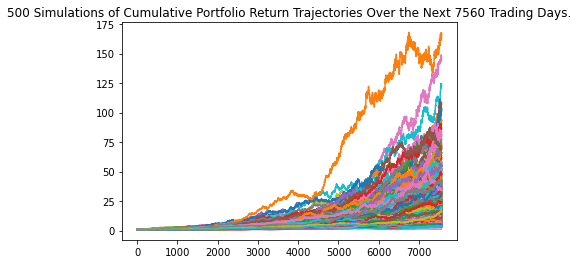

In [36]:
# Plot simulation outcomes
line_plot = MC_Crypto.plot_simulation()

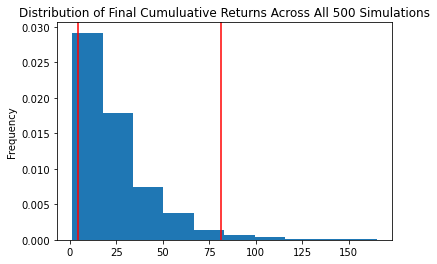

In [37]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Crypto.plot_distribution()

### Retirement Analysis

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
Sum_Stat = MC_Crypto.summarize_cumulative_return()

# Print summary statistics
print(Sum_Stat)

count           500.000000
mean             25.115355
std              20.714280
min               1.293763
25%              11.584285
50%              18.893328
75%              31.883382
max             165.039591
95% CI Lower      4.337176
95% CI Upper     81.351238
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [39]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(Sum_Stat[8]*initial_investment,2)
ci_upper = round(Sum_Stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $86743.52 and $1627024.77


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [40]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(Sum_Stat[8]*initial_investment_2,2)
ci_upper = round(Sum_Stat[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $130115.28 and $2440537.15
